RGB to GrayScale Conversion


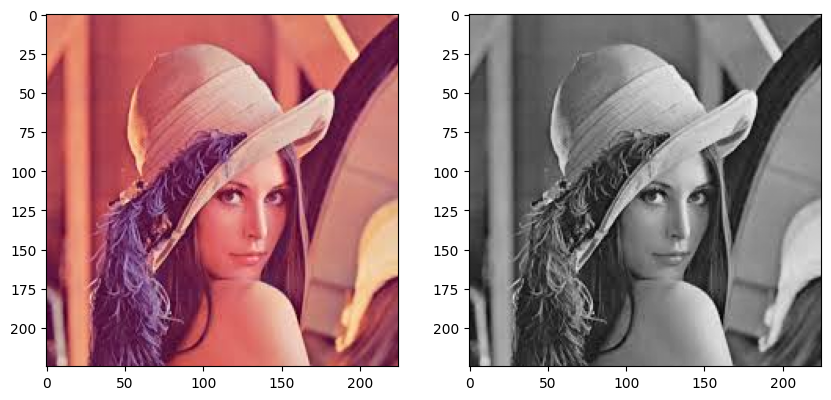

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import numpy as np

lenna = cv2.imread('lenna.jpg')
lenna = cv2.cvtColor(lenna, cv2.COLOR_RGB2BGR)
lenna_gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
fig=plt.figure(1)
img1,img2=fig.add_subplot(121),fig.add_subplot(122)
img1.imshow(lenna)
img2.imshow(lenna_gray,plt.colormaps["grey"])

RGB to GrayScale Conversion without function

True

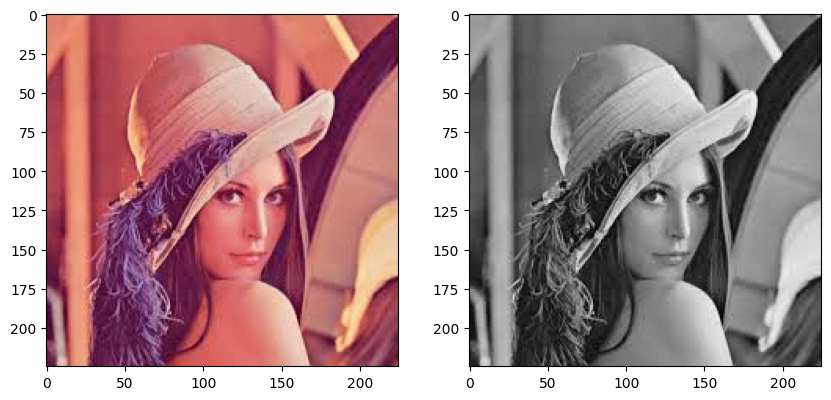

In [6]:
lenna = cv2.imread('lenna.jpg')
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
r,g,b= lenna[:,:,0],lenna[:,:,1],lenna[:,:,2]
gamma =1
r_const,g_const,b_const=0.2126,0.7152,0.0722
lenna_gray = (r_const*r**gamma)+(g_const*g**gamma)+(b_const*b**gamma)
plt.figure(figsize=(10,10))
fig=plt.figure(1)
img1,img2=fig.add_subplot(121),fig.add_subplot(122)
img1.imshow(lenna)
img2.imshow(lenna_gray,plt.colormaps["grey"])
cv2.imwrite('lennagrey.jpg',lenna_gray)

 HISTOGRAM EQUALISATION WITH FUNCTION:

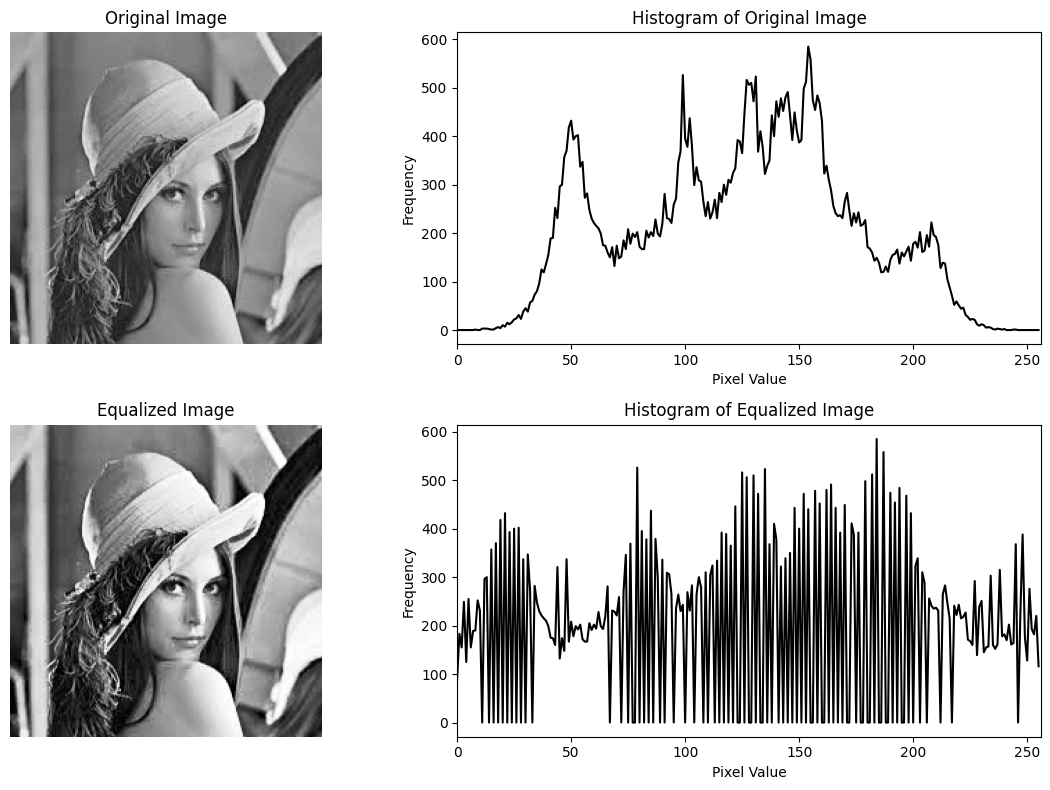

In [7]:
lenna = cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)
equi_lenna = cv2.equalizeHist(lenna)
o_hist = cv2.calcHist([lenna], [0], None, [256], [0, 256])
equi_hist = cv2.calcHist([equi_lenna], [0], None, [256], [0, 256])
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(lenna, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.plot(o_hist, color='black')
plt.title('Histogram of Original Image')
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(2, 2, 3)
plt.imshow(equi_lenna, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.plot(equi_hist, color='black')
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

HISTOGRAM EQUALISATION WITHOUT FUNCTION:

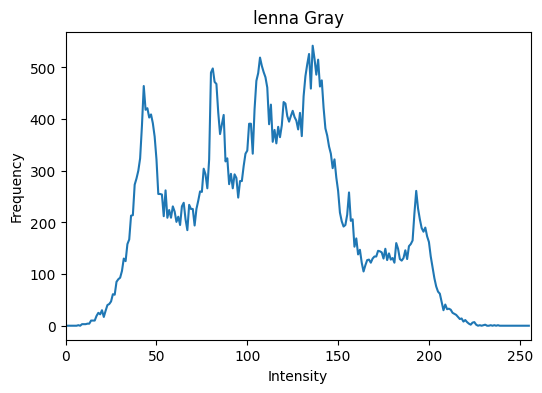

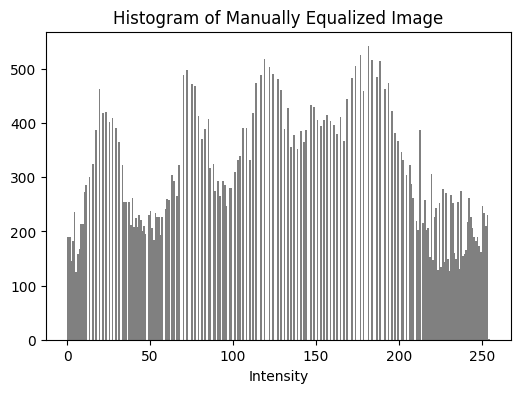

In [10]:
lenna = cv2.imread('lenna.jpg')
lenna = cv2.cvtColor(lenna, cv2.COLOR_RGB2BGR)
lenna_gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,4))
cv2_histogram = cv2.calcHist([lenna_gray], [0], None, [256], [0, 256])
plt.title("lenna Gray")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.plot(cv2_histogram)
plt.xlim([0, 256])
plt.show()
hist, bins = np.histogram(lenna_gray.flatten(), bins=256, range=[0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1]
equalized_image = cdf_normalized[lenna_gray]
equalized_image = np.uint8(equalized_image)
plt.figure(figsize=(6,4))
plt.hist(equalized_image.flatten(), bins=256, range=(0, 255), color='gray')
plt.title("Histogram of Manually Equalized Image")
plt.xlabel("Intensity")
plt.show()

Image Resizing

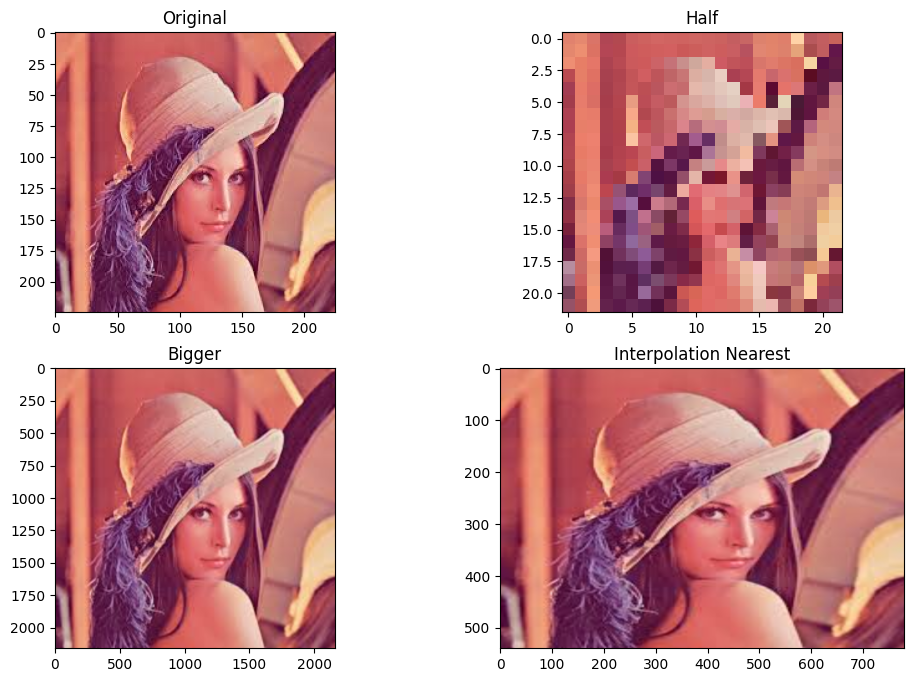

In [11]:
image = cv2.imread('lenna.jpg', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (2160, 2160))
stretch_near = cv2.resize(image, (780, 540),
interpolation = cv2.INTER_LINEAR)
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4
plt.figure(figsize=(12, 8))
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(images[i])
  plt.title(Titles[i])